In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.shape

(768, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

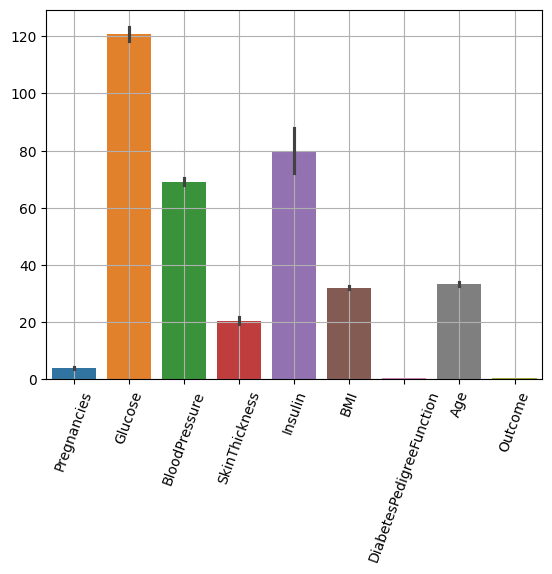

In [51]:
sns.barplot(df)
plt.grid()
plt.xticks(rotation=70)
plt.show()

In [52]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=15)

In [53]:
print("TRAIN DATASETS SHAPE")
print(x_train.shape)
print(y_train.shape)

TRAIN DATASETS SHAPE
(614, 8)
(614,)


In [54]:
print("TEST DATASETS SHAPE")
print(x_test.shape)
print(y_test.shape)

TEST DATASETS SHAPE
(154, 8)
(154,)


In [55]:
minmax = MinMaxScaler(feature_range=(0,1))
x_train = minmax.fit_transform(x_train)
x_test = minmax.fit_transform(x_test)

KNeighborsClassifier

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
knn_predict = knn_model.predict(x_test)

In [58]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       108
           1       0.68      0.50      0.58        46

    accuracy                           0.78       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.77      0.78      0.77       154



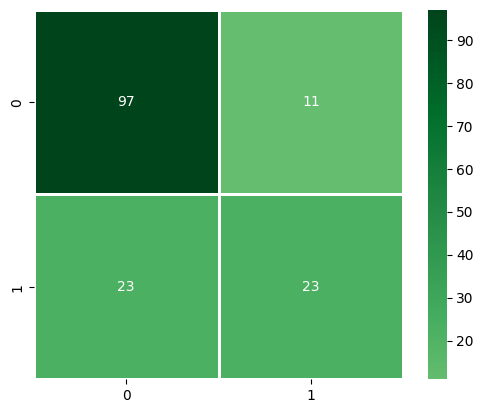

In [59]:
sns.heatmap(confusion_matrix(y_test,knn_predict),square=True,linewidths=2,annot=True,cmap='Greens',center=4)
plt.show()

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=30)

In [61]:
parametr = {'n_neighbors':np.arange(1,31)}
knn_model = GridSearchCV(knn_model,parametr,cv=5)
knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [62]:
knn_model.cv_results_['rank_test_score']

array([30, 26, 15, 28, 16, 20, 21, 21, 24, 27, 29, 25, 14, 13,  2,  4,  4,
        6,  1, 11,  8, 19, 12, 23,  7,  3,  9, 10, 17, 18])

In [63]:
knn_model.best_params_

{'n_neighbors': 19}

In [64]:
knn_model.best_score_

0.7573104091696654

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [66]:
y_pred = knn_model.predict(x_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       108
           1       0.63      0.41      0.50        46

    accuracy                           0.75       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.74      0.75      0.74       154



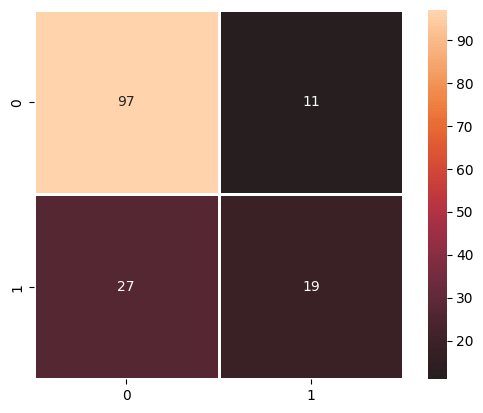

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,square=True,linewidths=2,center=6)
plt.show()

In [69]:
y_hat = cross_val_score(knn_model,X=x_train,y=y_train,cv=5)

In [70]:
y_hat.mean()

0.7573104091696654

In [71]:
result = cross_val_score(knn_model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [72]:
print("Cross-validated Scores:", result)
print("Mean Score:", result.mean())
print("Standard Deviation of Scores:", result.std(ddof=0))

Cross-validated Scores: [-0.22764228 -0.2195122  -0.2601626  -0.25203252 -0.25409836]
Mean Score: -0.2426895908303345
Standard Deviation of Scores: 0.016039761902499595


Decision Tree

In [73]:
dt_model = DecisionTreeClassifier(min_impurity_decrease=0.003,min_samples_leaf=7,max_depth=11)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_impurity_decrease=0.003,
                       min_samples_leaf=7)

In [74]:
dt_pred = dt_model.predict(x_test)

In [75]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       108
           1       0.57      0.52      0.55        46

    accuracy                           0.74       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.73      0.74      0.74       154



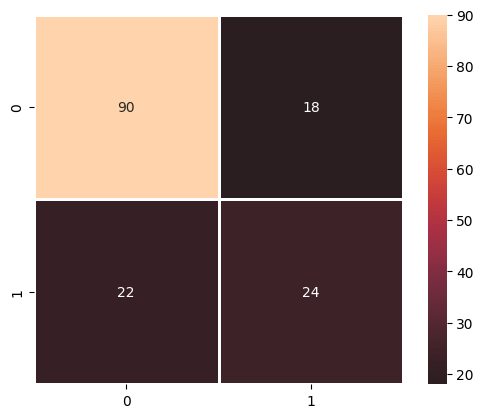

In [76]:
sns.heatmap(confusion_matrix(y_test,dt_pred),square=True,linewidths=2,annot=True,center=12)
plt.show()

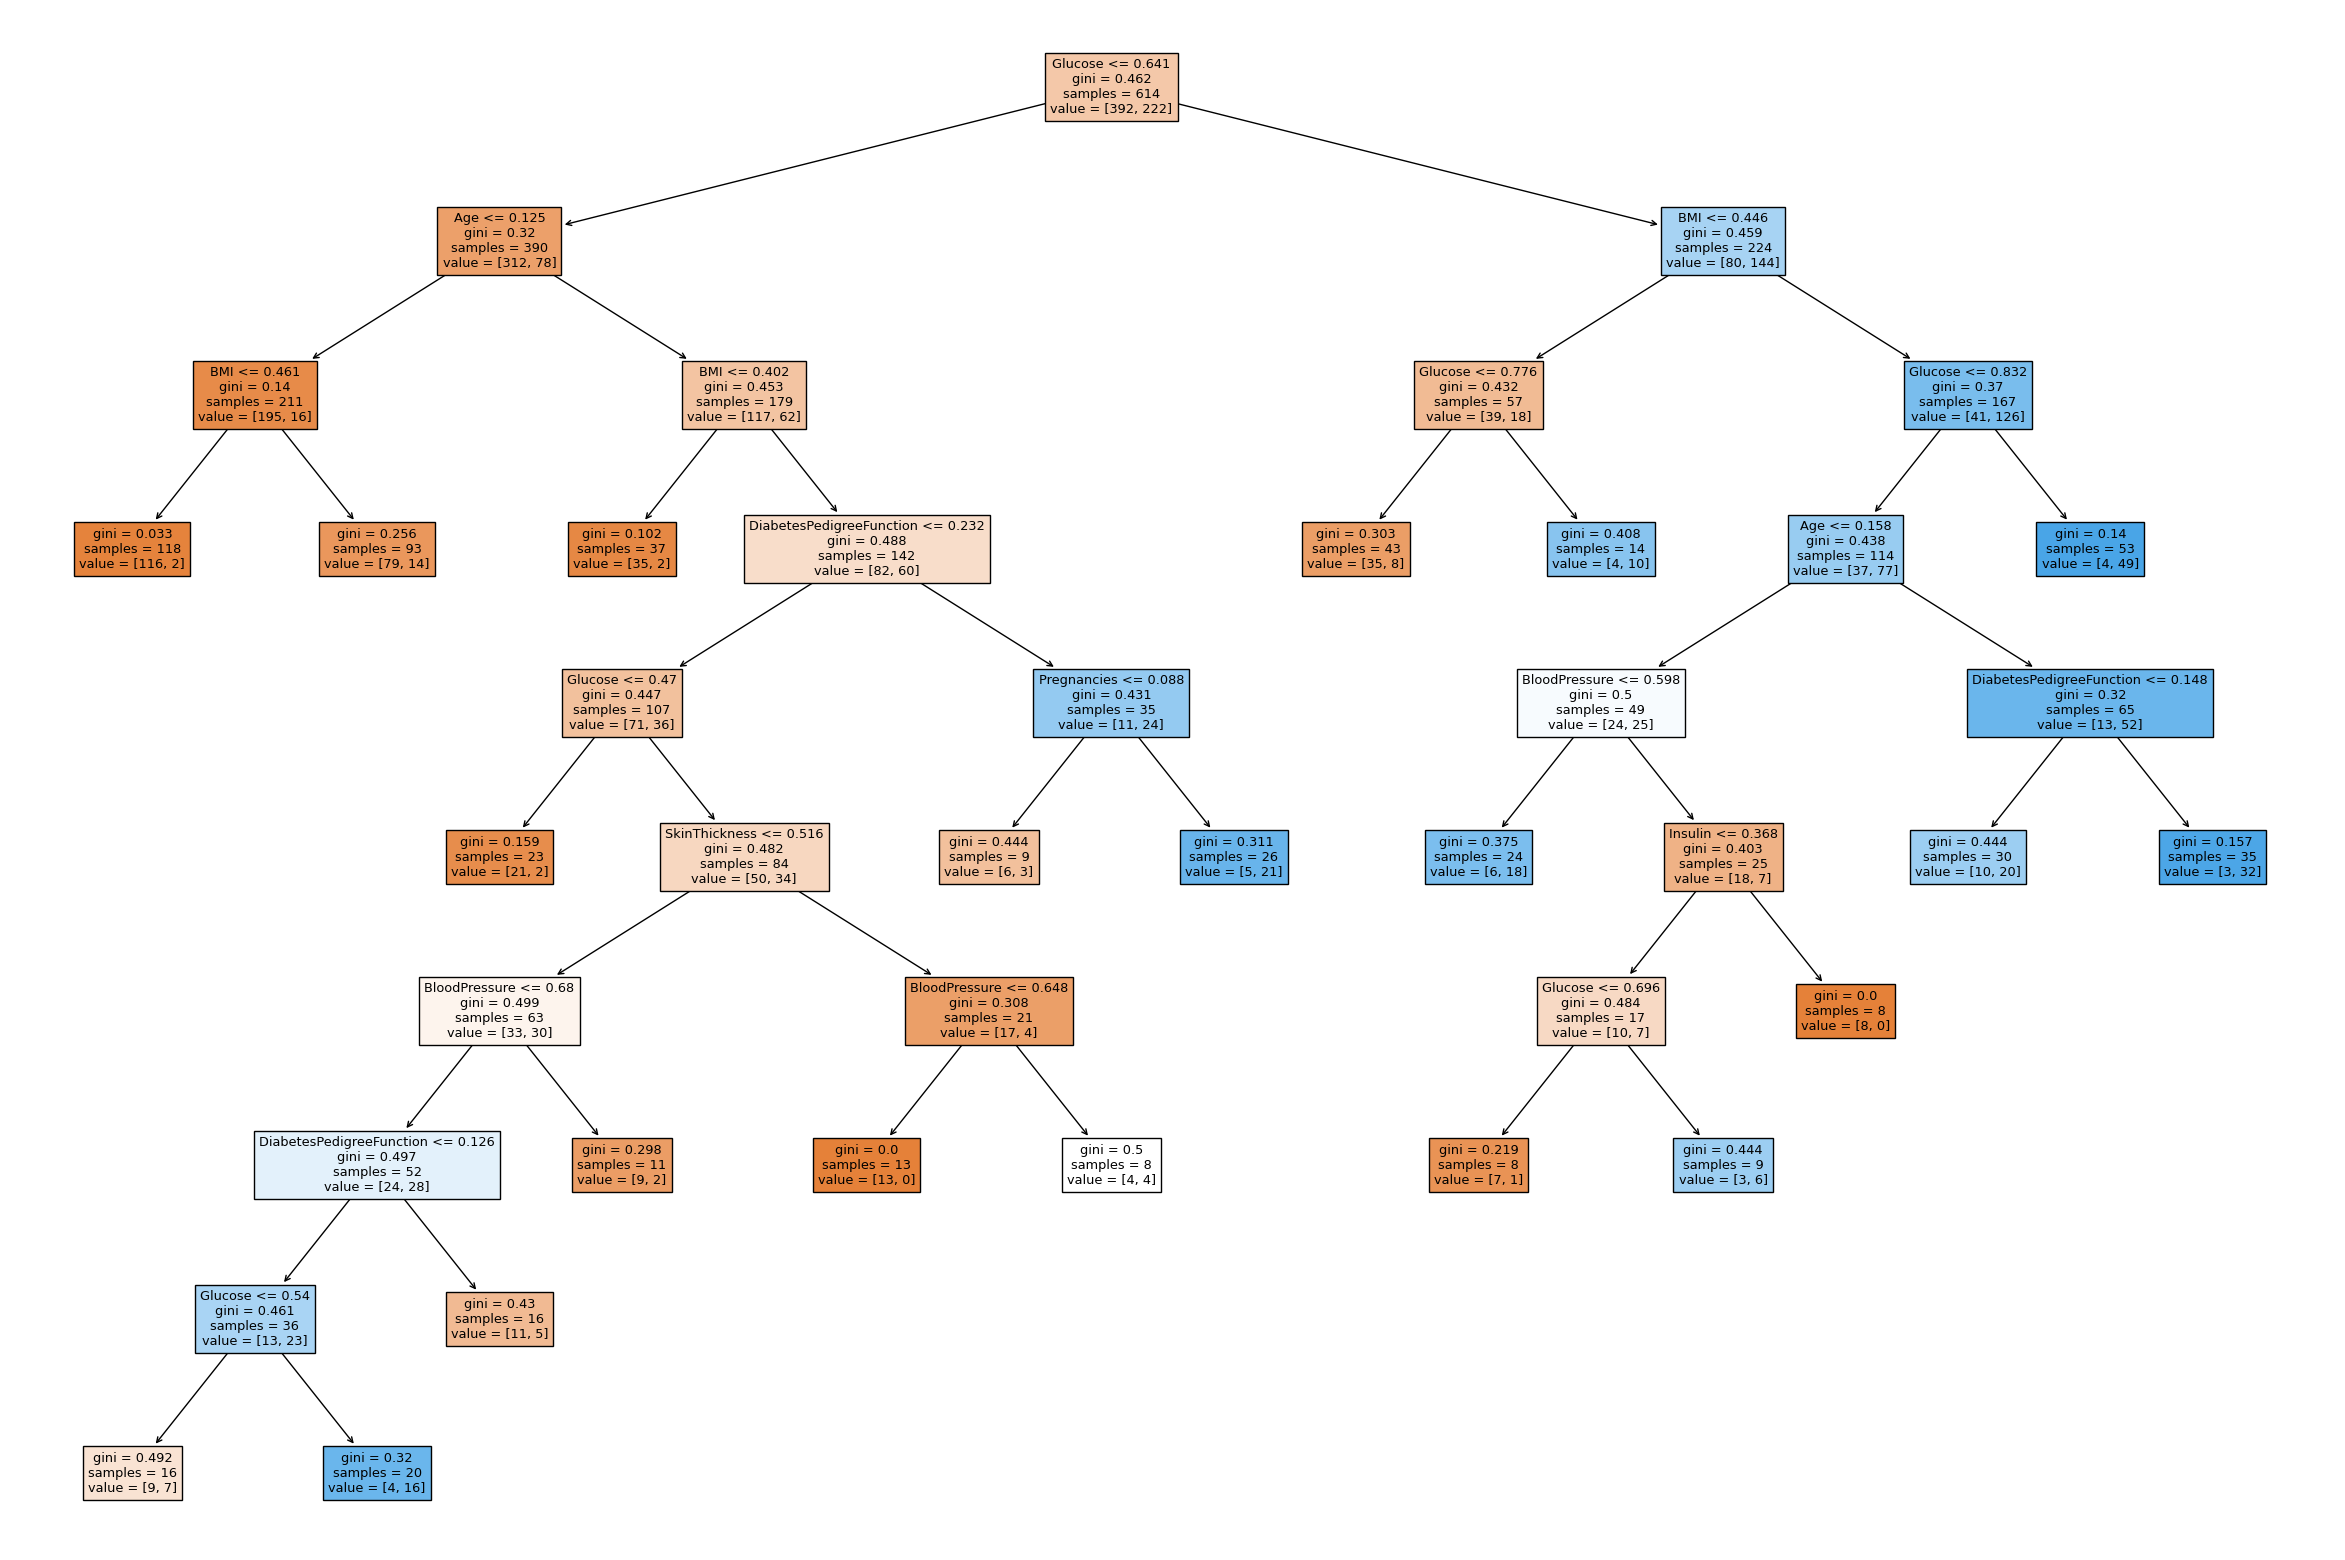

In [77]:
plt.figure(figsize=(30,20))
cols = df.drop('Outcome',axis=1).columns
classes = df['Outcome'].unique()
plot_tree(dt_model, feature_names=cols, filled=True)
plt.show()

Random Forest

In [78]:
rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25)

In [79]:
rf_pred = rf_model.predict(x_test)

In [80]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.53      0.57      0.55        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154



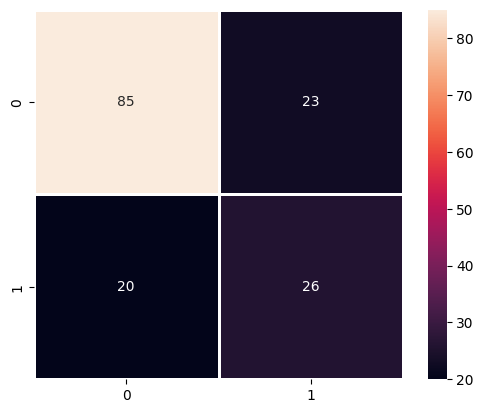

In [81]:
sns.heatmap(confusion_matrix(y_test,rf_pred),linewidths=2,square=True,annot=True)
plt.show()

LogisticRegression

In [82]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [83]:
lg_pred = lg_model.predict(x_test)

In [84]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       108
           1       0.63      0.52      0.57        46

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154



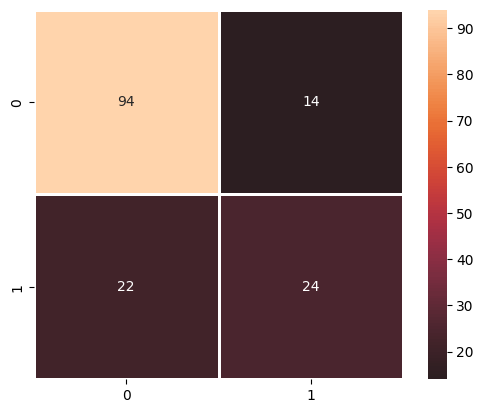

In [85]:
sns.heatmap(confusion_matrix(y_test,lg_pred),linewidths=2,square=True,annot=True,center=7)
plt.show()